<a href="https://colab.research.google.com/github/anushkakakkar/LGMVIP-DataScience-Internship/blob/main/Prediction_using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LetsGrowMore
# Name : Anushka Kakkar

# Task3: Prediction Using Decision Tree

# Level : Intermediate level task level task

Dataset: https://bit.ly/3kXTdox

# Introduction

Create a decision tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier,it would be able to predict the right class accordingly.

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline

# Loading the Dataset

In [2]:
from google.colab import files
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\r\n1,5.1,3.5,1.4,0.2,Iris-setosa\r\n2,4.9,3,1.4,0.2,Iris-setosa\r\n3,4.7,3.2,1.3,0.2,Iris-setosa\r\n4,4.6,3.1,1.5,0.2,Iris-setosa\r\n5,5,3.6,1.4,0.2,Iris-setosa\r\n6,5.4,3.9,1.7,0.4,Iris-setosa\r\n7,4.6,3.4,1.4,0.3,Iris-setosa\r\n8,5,3.4,1.5,0.2,Iris-setosa\r\n9,4.4,2.9,1.4,0.2,Iris-setosa\r\n10,4.9,3.1,1.5,0.1,Iris-setosa\r\n11,5.4,3.7,1.5,0.2,Iris-setosa\r\n12,4.8,3.4,1.6,0.2,Iris-setosa\r\n13,4.8,3,1.4,0.1,Iris-setosa\r\n14,4.3,3,1.1,0.1,Iris-setosa\r\n15,5.8,4,1.2,0.2,Iris-setosa\r\n16,5.7,4.4,1.5,0.4,Iris-setosa\r\n17,5.4,3.9,1.3,0.4,Iris-setosa\r\n18,5.1,3.5,1.4,0.3,Iris-setosa\r\n19,5.7,3.8,1.7,0.3,Iris-setosa\r\n20,5.1,3.8,1.5,0.3,Iris-setosa\r\n21,5.4,3.4,1.7,0.2,Iris-setosa\r\n22,5.1,3.7,1.5,0.4,Iris-setosa\r\n23,4.6,3.6,1,0.2,Iris-setosa\r\n24,5.1,3.3,1.7,0.5,Iris-setosa\r\n25,4.8,3.4,1.9,0.2,Iris-setosa\r\n26,5,3,1.6,0.2,Iris-setosa\r\n27,5,3.4,1.6,0.4,Iris-setosa\r\n28,5.2,3.5,1.5,0.2,Iris-seto

In [3]:
data=pd.read_csv('Iris.csv')
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Description of the Iris Data


In [5]:
data.shape

(150, 6)

In [6]:
data.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Checking the Null Values

In [8]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Checking the Data Counts

In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Using LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Encoded Species']=le.fit_transform(data['Species'])

In [11]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


# Splitting the data set into train test data sets

In [12]:
X=data.drop(["Species"],axis=1)
y=data["Species"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predicting Evaluating Decision Tree

In [16]:
prediction=dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [19]:
print(confusion_matrix(y_test,prediction))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [20]:
print(accuracy_score(y_test,prediction)*100,"%")

100.0 %


Accuracy Is 100%

# Tree Visualization

[Text(0.6, 0.8333333333333334, 'X[5] <= 1.5\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4, 0.5, 'X[0] <= 50.5\ngini = 0.496\nsamples = 68\nvalue = [31, 37, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

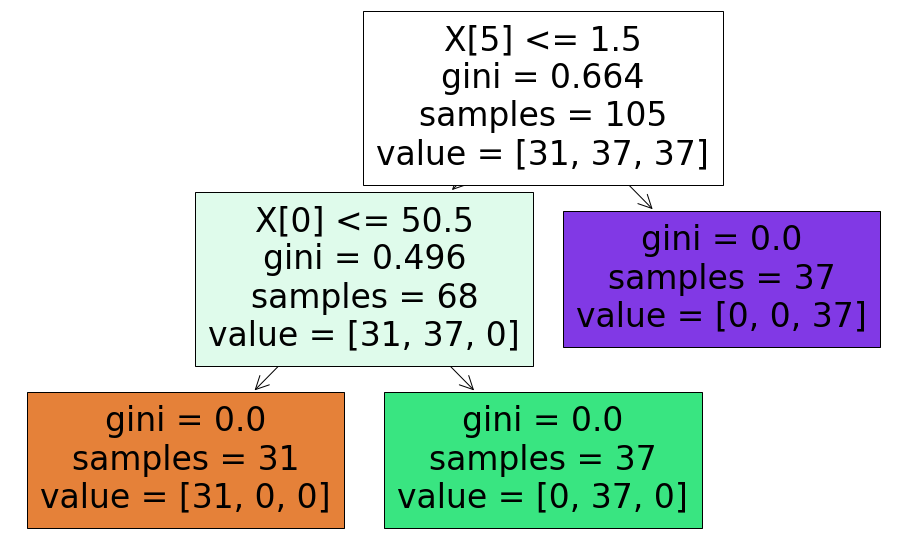

In [21]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtree,filled=True)